# Math Modeling: Lotka-Volterra 

### Importing Modules

In [1]:
import numpy as np
import ipywidgets as ipw
import math
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy import integrate

### Define Model

In [2]:
alpha = .4                                   #Combined Moose Survival Rate
gamma = .5                                   #Combined Wolf Survival Rate
mu =  .001                                   #Hunting Success Ratio
x0 = 1346.                                   #Initial Moose Population 1346
y0 = 28.                                     #Initial Wolf Population 28

def function(X, t, alpha, mu, gamma):        #Initialize System of Equations
    x, y = X
    dotx = x * (alpha - mu* y)               #Moose Population
    doty = y * (-gamma + mu * x)             #Wolf Population
    return np.array([dotx, doty])            #Returns Array of Eqs

Nt = 100                                     #Discretization
t_end = 100.                                 #100 Year Projection
t = np.linspace(0.,t_end, Nt)                #Discrete Time Array
n = .07143                                   #Norm Factor
X0 = [x0, y0]                                #Initital Condition Array

### Solving 

In [3]:
disc_sol = integrate.odeint(function, X0, t, args = (alpha, mu, gamma))       #Solution Solver
x, y = disc_sol.T                                                             #Transpose into Proper Structure
moose = x                                                                     #Save Current Var State
wolf = y                                                                      #Save Current Var State

### Plotting

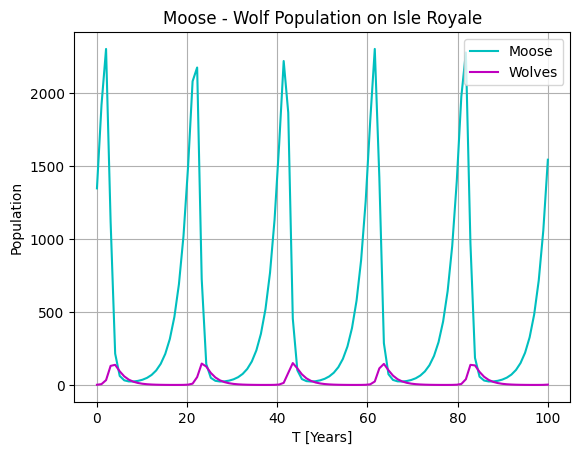

In [4]:
plt.figure()                                                                       #Connected Solution Plot
plt.grid()
plt.title("Moose - Wolf Population on Isle Royale")
plt.plot(t,x, "c", label = 'Moose')
#plt.plot(t,x, "co", markersize=3)
plt.plot(t, y*n, "m", label = "Wolves")
#plt.plot(t,y*n,"mo", markersize=3)
plt.xlabel('T [Years]')
plt.ylabel('Population')
plt.legend()
plt.show()

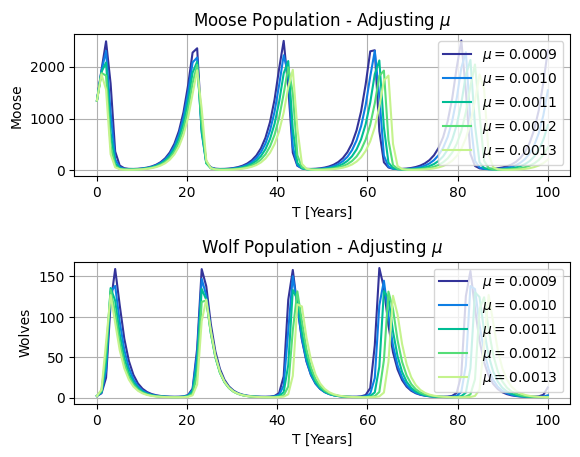

In [5]:
mus = np.arange(0.0009, .0014, 0.0001)

nums=np.random.random((10,len(mus)))
colors = cm.terrain(np.linspace(0, 1, nums.shape[0]))

fig, ax = plt.subplots(2,1)
fig.subplots_adjust(hspace=.6)


for mu, i in zip(mus, range(len(mus))):
    disc_sol = integrate.odeint(function, X0, t, args = (alpha, mu, gamma))
    x, y = disc_sol.T
    moose = x
    wolf = y
    ax[0].plot(t, disc_sol[:,0], color = colors[i],  linestyle = '-', label = r"$\mu = $" + "{0:.4f}".format(mu))
    ax[1].plot(t, disc_sol[:,1]*n, color = colors[i], linestyle = '-', label = r" $\mu = $" + "{0:.4f}".format(mu))
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_title('Moose Population - Adjusting $\mu$')
ax[0].set_xlabel('T [Years]')
ax[0].set_ylabel('Moose')
ax[1].set_title('Wolf Population - Adjusting $\mu$')
ax[1].set_xlabel('T [Years]')
ax[1].set_ylabel('Wolves');
ax[1].set_facecolor("white")
ax[0].set_facecolor("white")
plt.show()

## Difference Loop

In [6]:
def setup():                                               #Initial Conditions
    global x, y, xx, yy, xresult, yresult
    xx = x0
    yy = y0
    xresult = [xx]
    yresult = [yy]

def update():                                              #Update Solution Array
    global x, y, xx, yy, xresult, yresult
    xresult.append(x)
    yresult.append(y)
    
alpha = .43                                   
gamma = .51                              
mu =  .0015                               
x0 = 1346.                              
y0 = 28.    

def solve():                                                #Solution Loop
    global x, y, xx, yy, xresult, yresult, nextx, nexty
    nextx = xx * (alpha - mu* yy)
    nexty = yy * (-gamma + mu * xx)
    xx, yy = nextx, nexty
    nextx, nexty = x , y
    return xx, yy, x, y, nextx, nexty


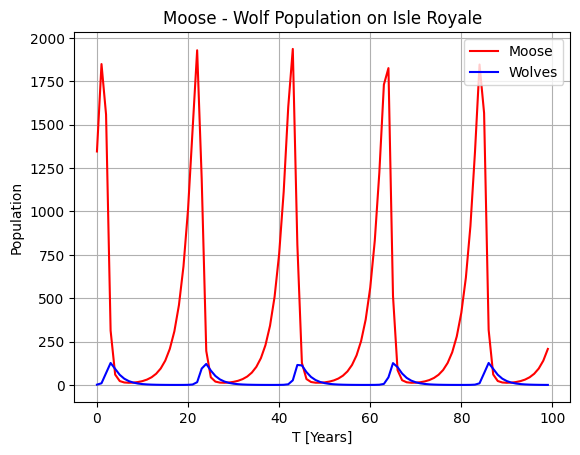

In [7]:
setup()
xresult = []
yresult = []
for t in range(100):
    solve()
    update()

plt.figure()                                                                      
plt.grid()
plt.title("Moose - Wolf Population on Isle Royale")
plt.plot(xresult[0], "r", label = 'Moose')
plt.plot(yresult[0]*n, "b", label = "Wolves")
plt.xlabel('T [Years]')
plt.ylabel('Population')
plt.legend(loc=1)
plt.show()
